## Clothing Classifier Program (Fashion MNIST)
### Using a CNN model and Optimizing with Keras Tuner

- https://www.kaggle.com/zalando-research/fashionmnist
- Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. 
- Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [3]:
fashion_mnist=keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
# As all the images are in gray scale format so we will scale down the images between 0 to 1
train_images=train_images/255.0
test_images=test_images/255.0

In [6]:
# Number of pixels
train_images[0].shape

(28, 28)

In [7]:
# For CNN model we need 4D array, so reshape the images array
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

#### Dense Layer
Dense layers are used when association can exist among any feature to any other feature in data point. Since between two layers of size n1 and n2, there can n1∗n2 connections and these are referred to as Dense.


#### Flatten Layer
Flatten layers are used when you got a multidimensional output and you want to make it linear to pass it onto a Dense layer. An output from flatten layers is passed to an MLP for classification or regression task you want to achieve. No weighting are associated with these too. Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer. Flattening and fully-connected layers are what we have at the last stage of CNN.

#### Dropout Layer
Dropout is a way of cutting too much association among features by dropping the weights (edges) at a probability. Reducing associations can be applied among any layers which stops weight updation for the edge. It has no weights associated with it. It is just there dropping things.

#### Convolution Layer
These are important when nearby associations among the features matter, example object detection. Neighborhoods matter to classify or detect. It is very less likely that the pixels at the opposite corners(very far away) are somehow helpful in these use cases. Filters does this job of getting associations among neighborhoods. This answer is great at understanding difference between 1D and 2D convolutions.

#### Pooling Layer
Pooling is the process of merging. So it’s basically for the purpose of reducing the size of the data. When we take the maximum value inside the filter, this is ‘max pooling.’ When we take the average values, this is ‘average pooling.’ And we can also tune the stride like what we do at the convolution layer. It helps in getting more ‘meaningful’ data than losing it. By removing some noise in the data and extracting only the significant one, we can reduce overfitting and speed up the computation.


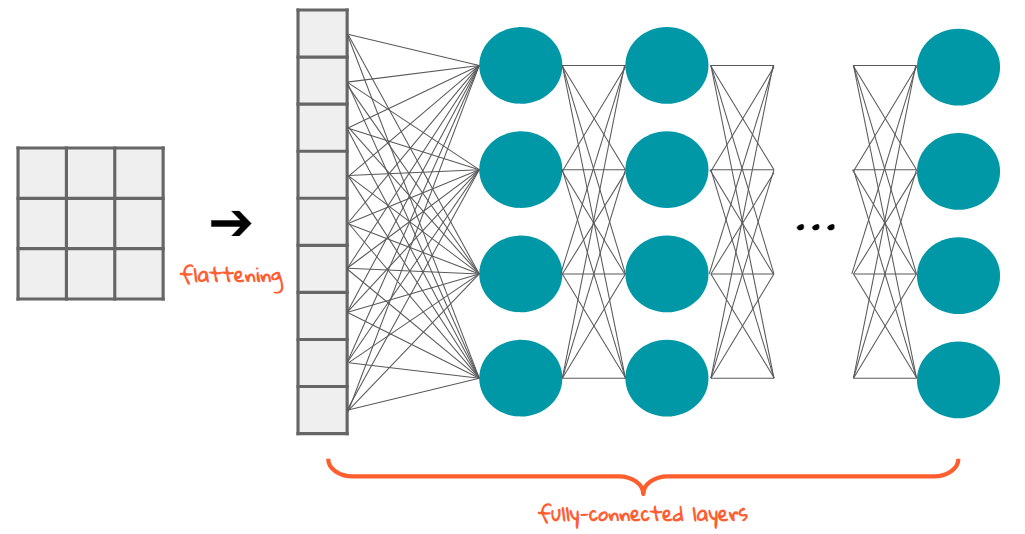

### Create CNN Model

In [8]:
# hp or hyperparameter model 
# Inside sequential layer for CNN we need to add a Conv2D layer
# We can add any number of Convolution 2D layers and then flatten and dense layers

def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

### Perform Hyperparameter Tuning

In [11]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [12]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [17]:
tuner_search.search_space_summary()

Search space summary
Default search space size: 6
conv_1_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
conv_1_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_2_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 16, 'sampling': None}
conv_2_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
dense_1_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001], 'ordered': True}


In [13]:
tuner_search.search(train_images, train_labels, epochs=3, validation_split=0.1)

Trial 5 Complete [00h 00m 24s]
val_accuracy: 0.9039999842643738

Best val_accuracy So Far: 0.9116666913032532
Total elapsed time: 00h 02m 19s
INFO:tensorflow:Oracle triggered exit


In [18]:
tuner_search.results_summary()

Results summary
Results in output/Mnist Fashion
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 3
dense_1_units: 80
learning_rate: 0.001
Score: 0.9116666913032532
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 112
learning_rate: 0.001
Score: 0.9039999842643738
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 5
conv_2_filter: 32
conv_2_kernel: 3
dense_1_units: 112
learning_rate: 0.001
Score: 0.9023333191871643
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 5
conv_2_filter: 32
conv_2_kernel: 5
dense_1_units: 48
learning_rate: 0.001
Score: 0.9018333554267883
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 3
dense_1_units: 80
learning_rate: 0.01
Score: 0.8734999895095825


In [14]:
model=tuner_search.get_best_models(num_models=1)[0]

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 80)                2478160   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                810       
Total params: 2,498,298
Trainable params: 2,498,298
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Get the optimal hyperparameters
best_hps=tuner_search.get_best_hyperparameters(num_trials=1)[0]

In [22]:
# Build the model with the optimal hyperparameters and train it on the data for 30 epochs
model = tuner_search.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=30, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5698 - accuracy: 0.8035 - val_loss: 0.3245 - val_accuracy: 0.8832
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2727 - accuracy: 0.8980 - val_loss: 0.2928 - val_accuracy: 0.8945
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2114 - accuracy: 0.9217 - val_loss: 0.2610 - val_accuracy: 0.9048
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1664 - accuracy: 0.9363 - val_loss: 0.2549 - val_accuracy: 0.9122
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1214 - accuracy: 0.9551 - val_loss: 0.2939 - val_accuracy: 0.9069
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0879 - accuracy: 0.9682 - val_loss: 0.3016 - val_accuracy: 0.9129
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0637 - accuracy: 0.9770 - val_loss: 0.3294 - val_accuracy:

In [23]:
# Re-instantiating the hypermodel and train it with the optimal number of epochs from above.
hypermodel = tuner_search.hypermodel.build(best_hps)
hypermodel.fit(train_images, train_labels, epochs=best_epoch)

Epoch 1/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5136 - accuracy: 0.8177
Epoch 2/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2539 - accuracy: 0.9063
Epoch 3/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1894 - accuracy: 0.9296
Epoch 4/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1373 - accuracy: 0.9482
Epoch 5/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0999 - accuracy: 0.9634
Epoch 6/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0694 - accuracy: 0.9741


In [25]:
eval_result = hypermodel.evaluate(train_images, train_labels)
print("[Test Loss, Test Accuracy]:", eval_result)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0637 - accuracy: 0.9771
[Test Loss, Test Accuracy]: [0.06370679289102554, 0.9771166443824768]


### Result
- Accuracy rate of 97.71% has been achieved with hypertuning